<a href="https://colab.research.google.com/gist/gretahartm/5d81193d5e63150829898961b21b0fec/5notebooksb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation

## Overview
- Data augmentation is a process where images and their corresponding masks are modified during loading via the dataset object.
- This process is stochastic, meaning that the images differ slightly in each training epoch.

## Purpose of Data Augmentation
- Improve the **generalization** of the model to new, unseen images.
  - By varying the images during each training epoch, the model learns to identify general features rather than memorizing specific features unique to individual labeled images.
- **Reduce labeling effort**: Augmentation increases the effective size of the training data, lowering the need for extensive labeling.

## Implementation
- **Library**: Albumentations is used to implement data augmentation.
- **Pipeline**: A transformation pipeline processes images as they are loaded from files.
  - Supports **image-mask pairs**, making it suitable for tasks like segmentation.

## Normalization
- Normalization (setting the mean and standard deviation of each channel to 0 and 1) can be integrated into the data augmentation pipeline.
- Refer to the notebook on data normalization for more details.



In [1]:
!pip install albumentations==1.3.0
!git clone https://github.com/kevin-allen/unetTracker
!pip install -r unetTracker/requirements.txt
!pip install -e unetTracker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20
Cloning into 'unetTracker'...
remote: Enumerating objects: 1022, done.
remote: Counting objects: 100% (401/401), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 1022 (delta 233), reused 353 (delta 204), pack-reused 621 (from 1)
Receiving objects: 100% (1022/1022), 127.56 MiB | 21.34 MiB/s, done.
Resolving deltas: 100% (623/623), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')

fn = "/content/drive/My Drive/ssfolder"
if os.path.exists(fn):
  print("We can access the ssfolder directory.")
else:
  raise IOError("Problem accessing the ssfolder directory.")

Mounted at /content/drive
We can access the ssfolder directory.


In [3]:
# this will run the code in the setup_project.py and create a variable called `project`
fn = "/content/drive/My Drive/ssfolder/setup_project.py"
if os.path.exists(fn):
  print("We can access the file.")
else:
  raise IOError("Problem accessing the file.")

%run "/content/drive/My Drive/ssfolder/setup_project.py"

We can access the file.
Project directory: /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker
Getting configuration from config file. Values from config file will be used.
Loading /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/config.yalm
{'augmentation_HorizontalFlipProb': 0.5, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [270, 480], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'simonebiles_tracker', 'normalization_values': {'means': [0.1952759027481079, 0.15899455547332764, 0.13951754570007324], 'stds': [0.16387943923473358, 0.16304421424865723, 0.16733983159065247]}, 'object_colors': [(240.0, 248.0, 255.0), (250.0, 235.0, 215.0), (0.0, 255.0, 255.0), (127.0, 255.0, 212.0), (240.0, 255.0, 255.0), (245.0, 245.0, 220.0), (255.0, 228.0, 196.0), (0.0, 0.0, 0.0), (255.0, 235.0, 205.0), (0.0, 0.0, 255.0)], 'objects': ['head', 'right

In [4]:
import albumentations as A
from unetTracker.dataset import UNetDataset

In [5]:
original_height = project.image_size[0]
original_width = project.image_size[1]
means = project.normalization_values["means"]
stds = project.normalization_values["stds"]

trainTransform = A.Compose([
                    A.RandomSizedCrop(min_max_height=(original_height-50, original_height),
                                      w2h_ratio=original_width/original_height,height=original_height, width=original_width,
                                      p=project.augmentation_RandomSizedCropProb),
                    A.HorizontalFlip(p=project.augmentation_HorizontalFlipProb),
                    A.Rotate (limit=30,border_mode=cv2.BORDER_CONSTANT,p=project.augmentation_RotateProb),

                    A.Normalize(mean=means, std=stds)
])

valTransform = A.Compose([
                    A.Normalize(mean=means, std=stds)
])


print(trainTransform)
print(valTransform)

Compose([
  RandomSizedCrop(always_apply=False, p=1.0, min_max_height=(220, 270), height=270, width=480, w2h_ratio=1.7777777777777777, interpolation=1),
  HorizontalFlip(always_apply=False, p=0.5),
  Rotate(always_apply=False, p=0.3, limit=(-30, 30), interpolation=1, border_mode=0, value=None, mask_value=None, rotate_method='largest_box', crop_border=False),
  Normalize(always_apply=False, p=1.0, mean=[0.1952759027481079, 0.15899455547332764, 0.13951754570007324], std=[0.16387943923473358, 0.16304421424865723, 0.16733983159065247], max_pixel_value=255.0),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})
Compose([
  Normalize(always_apply=False, p=1.0, mean=[0.1952759027481079, 0.15899455547332764, 0.13951754570007324], std=[0.16387943923473358, 0.16304421424865723, 0.16733983159065247], max_pixel_value=255.0),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})


In [6]:
project.augmentation_dir
if os.path.exists(project.augmentation_dir) == False:
    os.mkdir(project.augmentation_dir)

In [7]:
fileName = os.path.join(project.augmentation_dir,"trainTransform")
print("Saving trainTransform as", fileName)
pickle.dump( trainTransform, open( fileName, "wb" ))

Saving trainTransform as /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/augmentation/trainTransform


In [8]:
fileName = os.path.join(project.augmentation_dir,"valTransform")
print("Saving trainTransform as", fileName)
pickle.dump( valTransform, open( fileName, "wb" ))

Saving trainTransform as /content/drive/My Drive/ssfolder/trackingProjects/simonebiles_tracker/augmentation/valTransform


#Visualize the effect of data augmentation

In [9]:
train_image_dir = os.path.join(project.dataset_dir,"train_images")
train_mask_dir =  os.path.join(project.dataset_dir,"train_masks")
train_coordinate_dir = os.path.join(project.dataset_dir,"train_coordinates")
dataset_noAugmentation = UNetDataset(image_dir=train_image_dir,
                           mask_dir=train_mask_dir,
                           coordinate_dir=train_coordinate_dir,
                           transform=valTransform, # we pass our transform function to the UNetDataset object
                           image_extension=project.image_extension)
dataset_withAugmentation = UNetDataset(image_dir=train_image_dir,
                           mask_dir=train_mask_dir,
                           coordinate_dir=train_coordinate_dir,
                           transform=trainTransform, # we pass our transform function to the UNetDataset object
                           image_extension=project.image_extension)

In [10]:
imageNoAugmentation, _, _ = dataset_noAugmentation[0]
imageWithAugmentation, _, _ = dataset_withAugmentation[0]

In [11]:
imageNoAugmentation.mean(),imageWithAugmentation.mean()

(tensor(-0.1006), tensor(-0.1133))

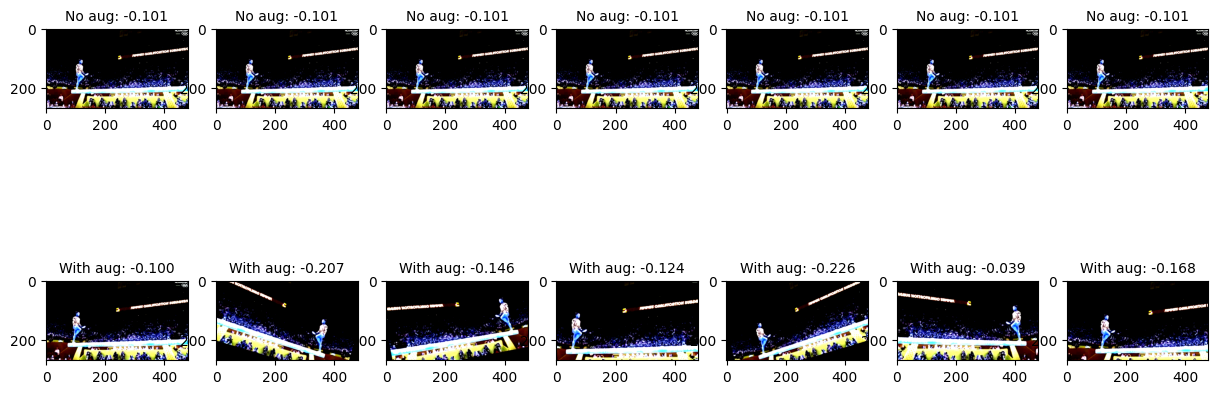

In [12]:
fig, axs = plt.subplots(2, 7,figsize=(15,6))
for i in range(7):
    imageNoAugmentation, _, _ = dataset_noAugmentation[0]
    imageWithAugmentation, _, _ = dataset_withAugmentation[0]
    axs[0,i].imshow(imageNoAugmentation.permute(1,2,0))
    axs[0,i].set_title("No aug: {:.3f}".format(imageNoAugmentation.mean().item()),fontsize=10)
    axs[1,i].imshow(imageWithAugmentation.permute(1,2,0))
    axs[1,i].set_title("With aug: {:.3f}".format(imageWithAugmentation.mean().item()),fontsize=10)